In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',
)

In [2]:
import keras

input_shape = (150, 150, 3)

model = keras.models.Sequential([
    keras.layers.Input(input_shape),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
train_image_gen = image_gen.flow_from_directory(
    '../resources/CATS_DOGS/train/',
    target_size=input_shape[:2],
    batch_size=16,
    class_mode='binary'
)
test_image_gen = image_gen.flow_from_directory(
    '../resources/CATS_DOGS/test/',
    target_size=input_shape[:2],
    batch_size=16,
    class_mode='binary'
)

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [5]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [6]:
results = model.fit(
    train_image_gen,
    epochs=50,
    steps_per_epoch=150,
    validation_data=test_image_gen,
    validation_steps=12,
)

Epoch 1/50
135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5038 - loss: 0.7081

/Users/captain-mac/Documents/Code/computer_vision_python/.venv/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.4917 - loss: 0.6976 - val_accuracy: 0.4844 - val_loss: 0.6931
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.5483 - loss: 0.6922 - val_accuracy: 0.5677 - val_loss: 0.6852
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5462 - loss: 0.6890 - val_accuracy: 0.6042 - val_loss: 0.6659
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5726 - loss: 0.6855 - val_accuracy: 0.5729 - val_loss: 0.6807
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.5721 - loss: 0.6779 - val_accuracy: 0.5521 - val_loss: 0.6818
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.5783 - loss: 0.6755 - val_accuracy: 0.6719 - val_loss: 0.6228
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6492 - loss: 0.6526 - val_accuracy: 0.5990 - val_loss: 0.6608
Epoch 8/50
122/150 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6276 - loss: 0.6372

/Users/captain-mac/Documents/Code/computer_vision_python/.venv/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6276 - loss: 0.6472 - val_accuracy: 0.6719 - val_loss: 0.6172
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6313 - loss: 0.6471 - val_accuracy: 0.6146 - val_loss: 0.6536
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.6450 - loss: 0.6330 - val_accuracy: 0.6719 - val_loss: 0.6258
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.6521 - loss: 0.6266 - val_accuracy: 0.7292 - val_loss: 0.6084
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.6917 - loss: 0.6078 - val_accuracy: 0.6510 - val_loss: 0.6350
Epoch 13/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.6513 - loss: 0.6274 - val_accuracy: 0.6823 - val_loss: 0.5869
Epoch 14/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6808 - loss: 0.6109 - val_accuracy: 0.7812 - val_loss: 0.5336
Epoch 15/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6971 - loss: 0.5851 - val_accuracy

In [7]:
import pandas as pd 

history_df = pd.DataFrame(results.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.491667,0.697642,0.484375,0.693119
1,0.548333,0.692198,0.567708,0.685241
2,0.546250,0.689044,0.604167,0.665900
3,0.572564,0.685504,0.572917,0.680722
4,0.572083,0.677897,0.552083,0.681848


In [8]:
history_df.shape

(50, 4)

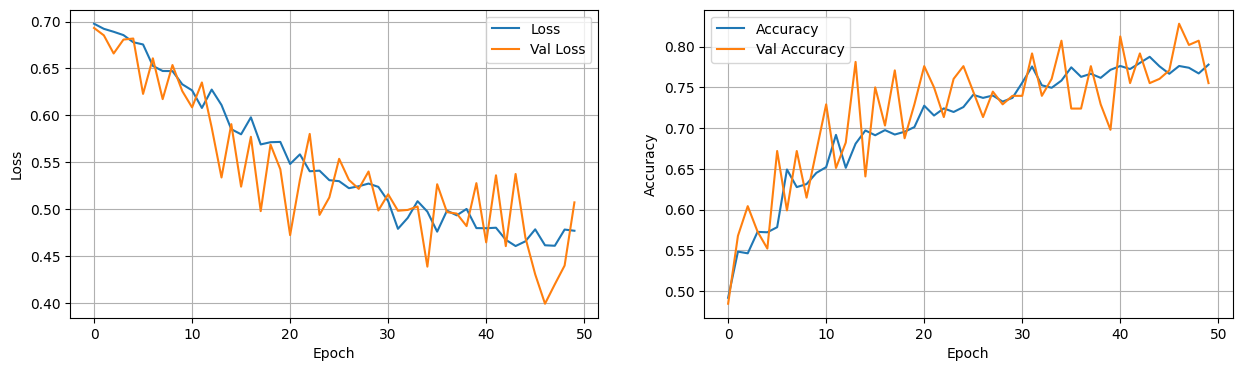

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

epochs = np.arange(0, history_df.shape[0])

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_df['loss'], label='Loss')
plt.plot(epochs, history_df['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_df['accuracy'], label='Accuracy')
plt.plot(epochs, history_df['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.show()

In [17]:
model.evaluate(test_image_gen)

391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.7964 - loss: 0.4458


[0.445764422416687, 0.7963525652885437]